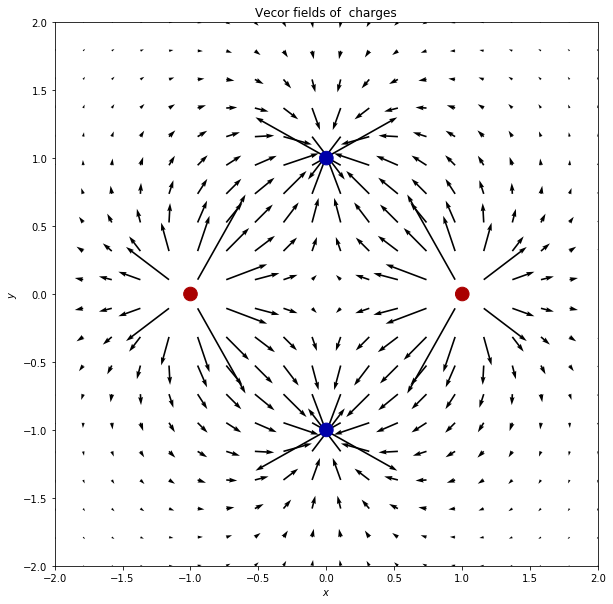

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

#number of charges
n_q = 4



# Return the electric field in Cartisian coordinates
def E(q, r0, x, y):
    #E(Ex,Ey) from r0
    r = np.hypot(x-r0[0], y-r0[1])**2
    return q * (x - r0[0]) / r, q * (y - r0[1]) / r

# Grid of x, y points
n = 20
x = np.linspace(-2, 2, n)
y = np.linspace(-2, 2, n)
X, Y = np.meshgrid(x, y)

# Creates the charges alternating around the orgin ie(point charge, dipole, qudropole)
charges = []
for i in range(n_q):
    q = i%2 * 2 - 1
    charges.append((q, (np.cos(2*np.pi*i/n_q), np.sin(2*np.pi*i/n_q))))

# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((n, n)), np.zeros((n, n))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex -= ex
    Ey -= ey

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Plot the vectors
ax.quiver(x, y, Ex, Ey)

# Add filled circles for the charges themselves
charge_colors = {False: '#aa0000', True: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

plt.title('Vecor fields of  charges')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()